
# Group 4 — Young Tech Couple: All-in-One Analysis (English Version)

**Goal:** Deliver an end-to-end analysis for a newly married tech couple seeking a modern condo/apartment near Seattle's tech hubs.
**Pipeline:** Cleaning → EDA → Boxplots & Outliers → Anomaly Filtering → Market Insights (Big Questions) → Hypothesis Testing (with equations) → Client-Facing Visuals → Shortlist → Story (What/Why/When).

**Dataset:** `KC_housing_data.csv` (adjust path if needed)
**Outputs:** `KC_housing_clean.csv`, `shortlist_group4.csv`

---

## Table of Contents
1. Environment & Paths
2. Load Data & Quick Overview
3. Descriptive Statistics & Missingness
4. Feature Preparation (date, ZIP, price per sqft)
5. Boxplots (Before Cleaning)
6. IQR-Based Outlier Removal
7. Boxplots (After IQR)
8. Anomaly Filtering (domain rules)
9. Final Descriptive Stats & Save Clean File
10. Market Insights — Answer the Big Questions
11. Hypothesis Testing — Equations & Rationale + Tests
12. Client-Facing Visuals
13. Shortlist (Top 20)
14. Story Summary — What / Why / When


## 1) Environment & Paths

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# === Paths ===
# If you're on Windows, you can set e.g. Path(r"C:\\Users\\you\\Desktop\\da\\KC_housing_data.csv") or use forward slashes.
DATA_PATH = Path('./Data/KC_housing_data.csv')
CLEAN_PATH = Path('./Data/KC_housing_clean.csv')
SHORTLIST_PATH = Path('./Data/shortlist_group4.csv')

plt.rcParams.update({'figure.figsize': (8,5)})


## 2) Load Data & Quick Overview

In [13]:
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
df.head()

Shape: (4600, 18)

Dtypes:
 date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## 3) Descriptive Statistics & Missingne

In [14]:

desc_numeric_before = df.describe().T
missing_before = df.isna().sum().sort_values(ascending=False)

print("Descriptive statistics (numeric, before cleaning):")
display(desc_numeric_before)

print("\nMissing values per column (before cleaning):")
display(missing_before)


Descriptive statistics (numeric, before cleaning):


,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0



Missing values per column (before cleaning):


date             0
price            0
statezip         0
city             0
street           0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
country          0
dtype: int64

## 4) Feature Preparation (date, ZIP, price per sqft)

In [15]:

# Date
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# ZIP extraction from 'statezip' (e.g., 'WA 98119' -> '98119')
def extract_zip(s):
    if pd.isna(s):
        return np.nan
    parts = str(s).split()
    for p in parts[::-1]:
        if p.isdigit():
            return p
    return np.nan

df['zip'] = df['statezip'].apply(extract_zip)

# Price per sqft
df['price_psf'] = df['price'] / df['sqft_living'].replace(0, np.nan)

# City normalization
df['city'] = df['city'].astype(str).str.title()

df[['date','zip','price','sqft_living','price_psf','bedrooms','bathrooms']].head()


,date,zip,price,sqft_living,price_psf,bedrooms,bathrooms
0,2014-05-02,98133,313000.0,1340,233.582090,3.0,1.50
1,2014-05-02,98119,2384000.0,3650,653.150685,5.0,2.50
2,2014-05-02,98042,342000.0,1930,177.202073,3.0,2.00
3,2014-05-02,98008,420000.0,2000,210.000000,3.0,2.25
4,2014-05-02,98052,550000.0,1940,283.505155,4.0,2.50


## 5) Boxplots (Before Cleaning)

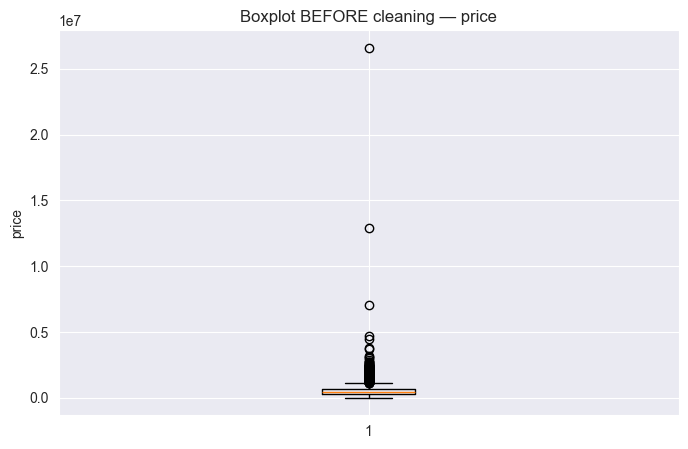

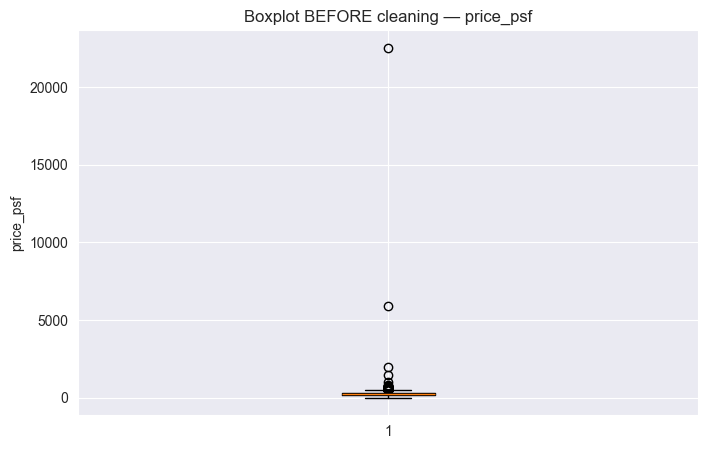

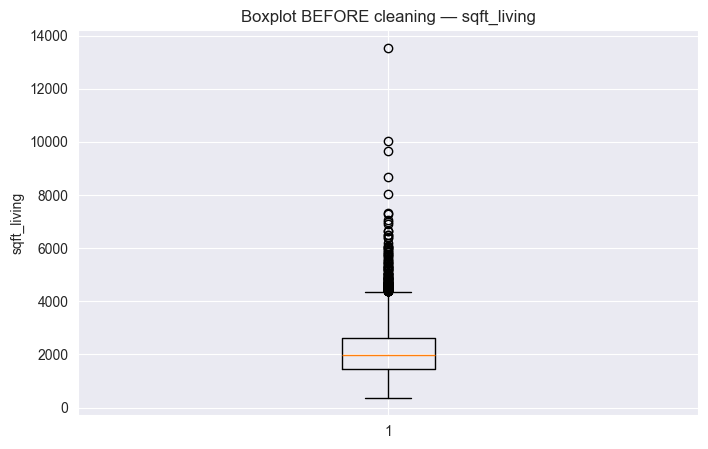

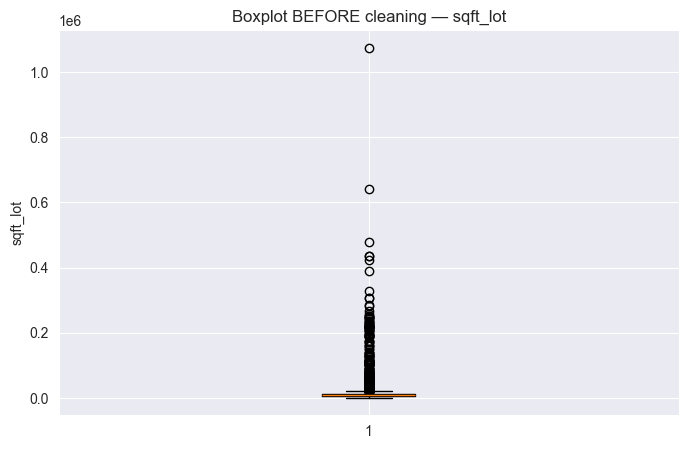

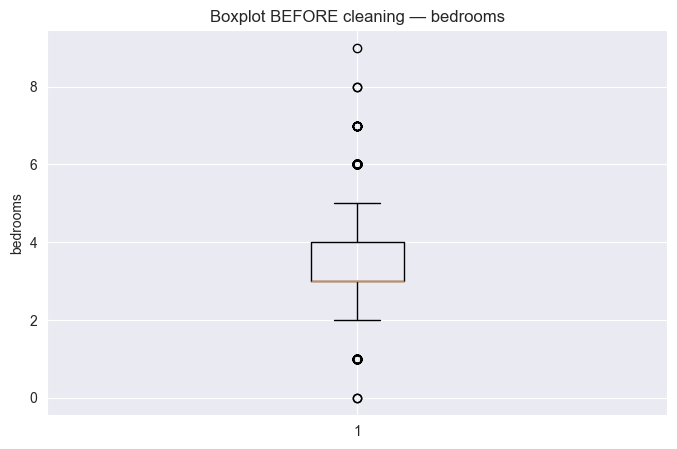

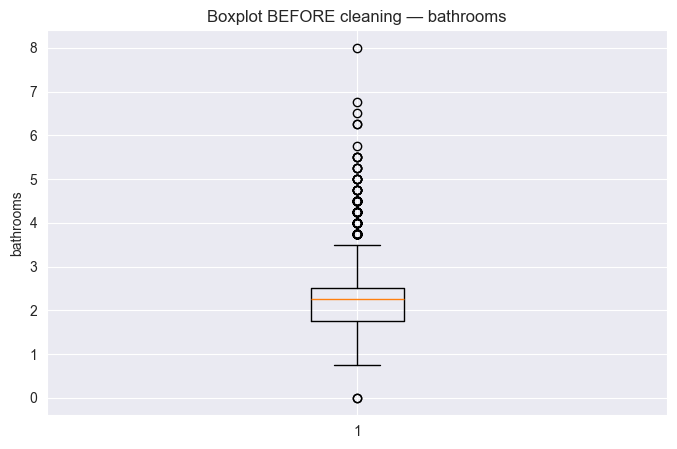

In [16]:
box_cols = ['price','price_psf','sqft_living','sqft_lot','bedrooms','bathrooms']
for c in box_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True, showfliers=True)
    plt.title(f'Boxplot BEFORE cleaning — {c}')
    plt.ylabel(c)
    plt.show()

## 6) IQR-Based Outlier Removal (per column)

In [17]:

def iqr_bounds(s, k=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    return q1 - k*iqr, q3 + k*iqr

df_iqr = df.copy()
removed_stats = []
for c in box_cols:
    s = df_iqr[c].dropna()
    if s.empty:
        continue
    lo, up = iqr_bounds(s, k=1.5)
    before_n = len(df_iqr)
    df_iqr = df_iqr[(df_iqr[c].isna()) | ((df_iqr[c] >= lo) & (df_iqr[c] <= up))]
    after_n = len(df_iqr)
    removed_stats.append({'column': c, 'lower': lo, 'upper': up, 'removed_rows': before_n - after_n})
removed_log = pd.DataFrame(removed_stats)
print("IQR removal summary:")
display(removed_log)
print("Shape after IQR removal:", df_iqr.shape)


IQR removal summary:


,column,lower,upper,removed_rows
0,price,-175256.250000,1.153094e+06,240
1,price_psf,-12.917802,4.934976e+02,99
2,sqft_living,-157.000000,4.155000e+03,74
3,sqft_lot,-3250.000000,1.875000e+04,479
4,bedrooms,1.500000,5.500000e+00,74
5,bathrooms,0.625000,3.625000e+00,30


Shape after IQR removal: (3604, 20)


## 7) Boxplots (After IQR)

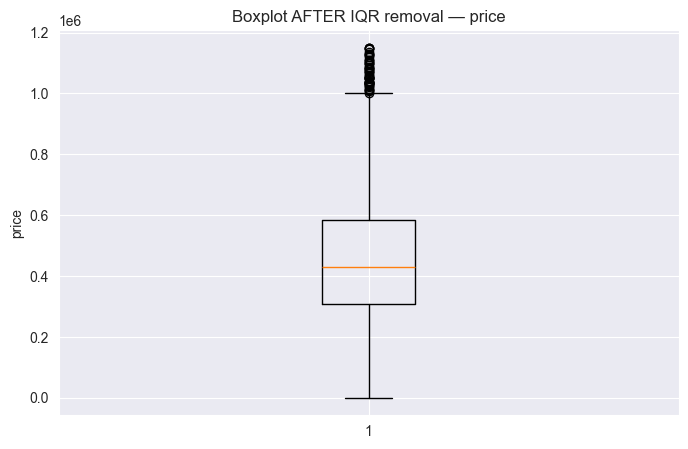

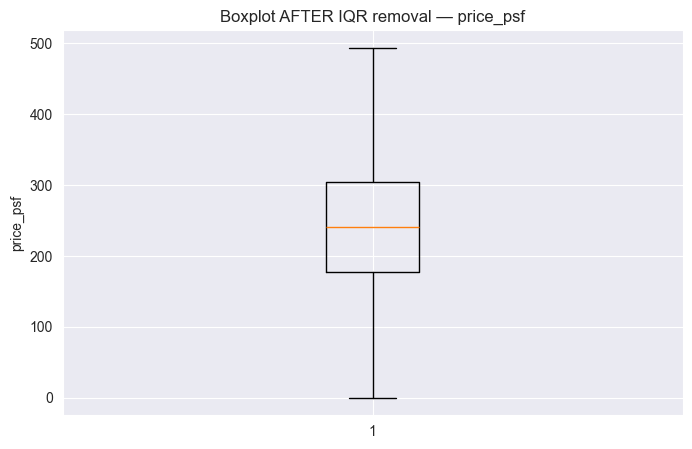

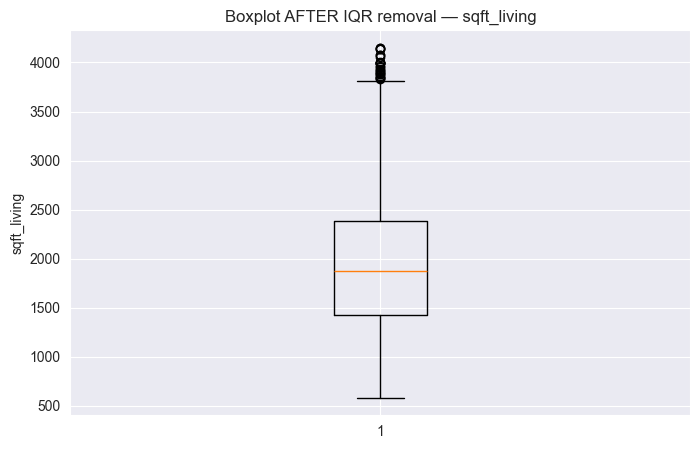

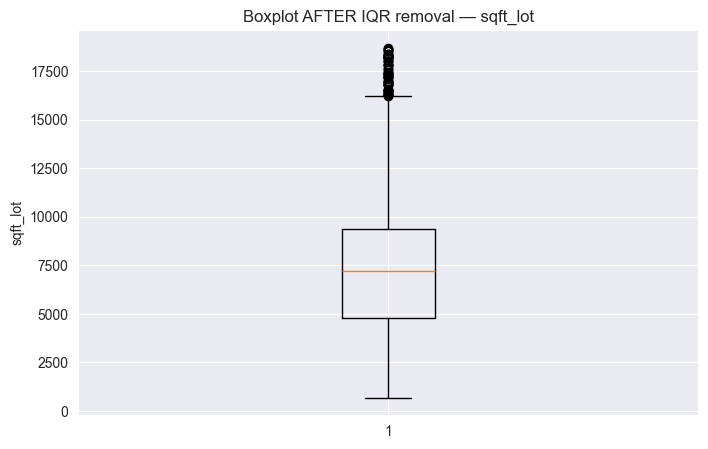

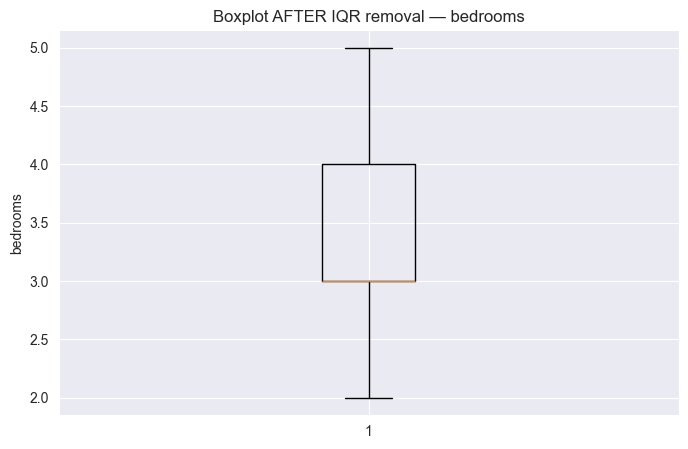

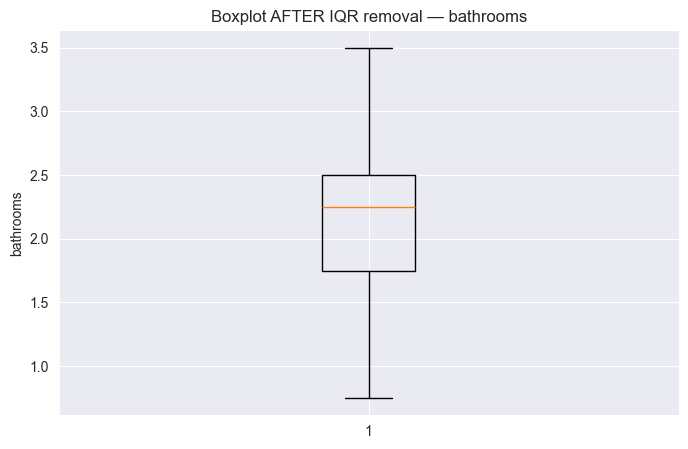

In [18]:

for c in box_cols:
    plt.figure()
    plt.boxplot(df_iqr[c].dropna(), vert=True, showfliers=True)
    plt.title(f'Boxplot AFTER IQR removal — {c}')
    plt.ylabel(c)
    plt.show()


## 8) Anomaly Filtering (Domain Rules)

---



In [20]:

def apply_anomaly_rules(frame):
    rules = []
    cur = frame.copy()
    def apply_and_log(mask, reason):
        nonlocal cur, rules
        removed = cur[~mask]
        rules.append({'rule': reason, 'removed_count': removed.shape[0]})
        cur = cur[mask]
    # Domain sanity checks (tweakable)
    apply_and_log(cur['price'] > 50000, "price > 50,000")
    apply_and_log(cur['sqft_living'] > 200, "sqft_living > 200")
    apply_and_log(cur['bedrooms'] > 0, "bedrooms > 0")
    apply_and_log(cur['bathrooms'] > 0, "bathrooms > 0")
    apply_and_log(cur['floors'] > 0, "floors > 0")
    return cur, pd.DataFrame(rules)

df_clean, anomaly_log = apply_anomaly_rules(df_iqr)
print("Anomaly filtering summary:")
display(anomaly_log)
print("Final shape:", df_clean.shape)


Anomaly filtering summary:


,rule,removed_count
0,"price > 50,000",30
1,sqft_living > 200,0
2,bedrooms > 0,0
3,bathrooms > 0,0
4,floors > 0,0


Final shape: (3574, 20)


## 9) Final Descriptive Stats & Save Clean File

In [21]:

final_desc = df_clean.describe().T
display(final_desc)
df_clean.to_csv(CLEAN_PATH, index=False)
print(f"Saved cleaned dataset to: {CLEAN_PATH}")


,count,mean,min,25%,50%,75%,max,std
date,3574,2014-06-07 01:54:01.410184704,2014-05-02 00:00:00,2014-05-21 00:00:00,2014-06-09 00:00:00,2014-06-24 00:00:00,2014-07-10 00:00:00,NaN
price,3574.0,468004.246872,83000.0,310000.0,435000.0,586875.0,1150000.0,203073.555261
bedrooms,3574.0,3.317851,2.0,3.0,3.0,4.0,5.0,0.777324
bathrooms,3574.0,2.052882,0.75,1.75,2.25,2.5,3.5,0.653845
sqft_living,3574.0,1939.456072,580.0,1410.75,1870.0,2380.0,4150.0,686.543994
sqft_lot,3574.0,7234.935926,681.0,4800.0,7200.0,9350.0,18700.0,3492.809476
floors,3574.0,1.494824,1.0,1.0,1.5,2.0,3.5,0.544585
waterfront,3574.0,0.001119,0.0,0.0,0.0,0.0,1.0,0.03344
view,3574.0,0.134303,0.0,0.0,0.0,0.0,4.0,0.556249
condition,3574.0,3.44432,1.0,3.0,3.0,4.0,5.0,0.662544


Saved cleaned dataset to: Data/KC_housing_clean.csv


## 10) Market Insights — Answer the Big Questions

### 10.1 What are the current market patterns? (Seattle focus)

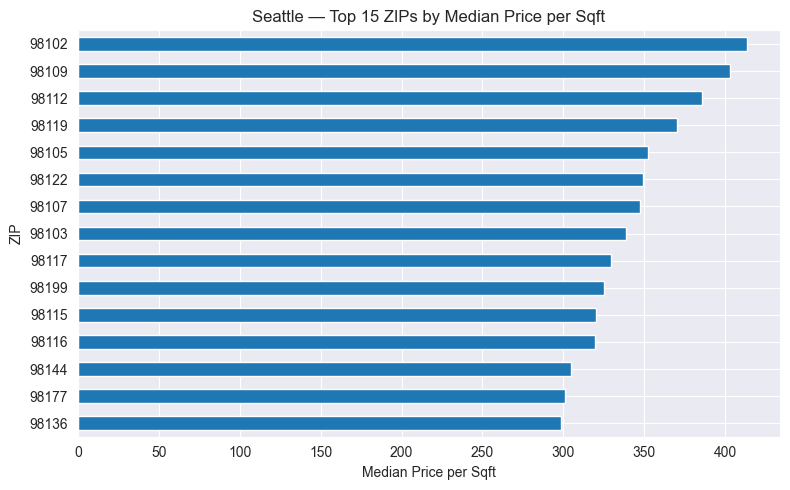

zip
98102    413.245707
98109    403.284672
98112    385.906040
98119    370.495787
98105    352.272727
Name: price_psf, dtype: float64

In [22]:

seattle = df_clean[df_clean['city']=="Seattle"].copy()
zip_med_psf = (seattle.groupby('zip')['price_psf']
               .median().dropna().sort_values(ascending=False).head(15))

plt.figure()
zip_med_psf.sort_values().plot(kind='barh')
plt.title('Seattle — Top 15 ZIPs by Median Price per Sqft')
plt.xlabel('Median Price per Sqft'); plt.ylabel('ZIP')
plt.tight_layout(); plt.show()

zip_med_psf.head()


### 10.2 When is the best time to buy or sell? (Seasonality)

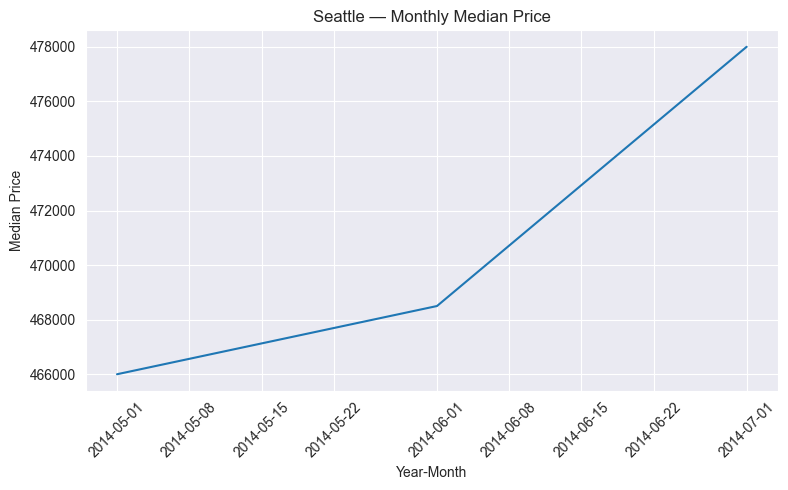

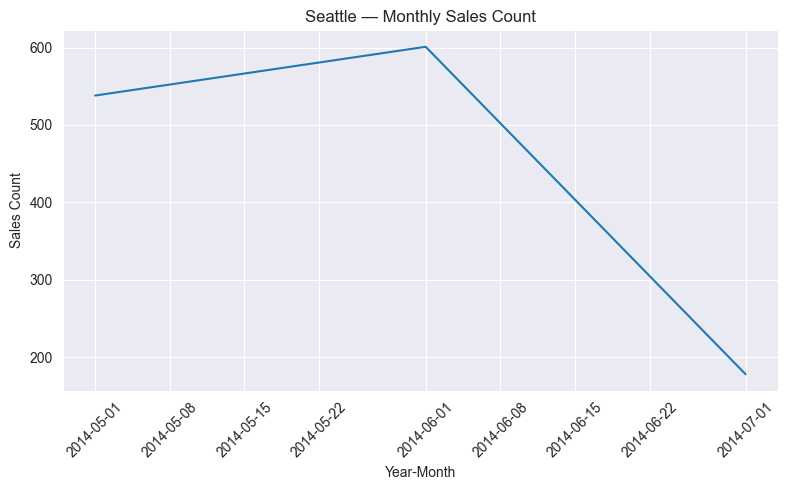

,ym,median_price,sales
0,2014-05-01,466000.0,538
1,2014-06-01,468500.0,601
2,2014-07-01,478000.0,178


In [23]:

sea = seattle.copy()
sea['ym'] = sea['date'].dt.to_period('M').astype(str)
monthly = sea.groupby('ym').agg(median_price=('price','median'),
                                sales=('price','count')).reset_index()
monthly['ym'] = pd.to_datetime(monthly['ym'])

plt.figure()
plt.plot(monthly['ym'], monthly['median_price'])
plt.title('Seattle — Monthly Median Price')
plt.xlabel('Year-Month'); plt.ylabel('Median Price')
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

plt.figure()
plt.plot(monthly['ym'], monthly['sales'])
plt.title('Seattle — Monthly Sales Count')
plt.xlabel('Year-Month'); plt.ylabel('Sales Count')
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

monthly.tail()


### 10.3 Which property types/locations fit the client? (Proxy condo subset)

,Seattle All,Proxy Condo
count,1317.0,12.000000
median_price,468500.0,336419.000000
median_psf,300.0,379.125521
median_sqft,1630.0,980.000000
median_yr_built,1947.0,2007.000000


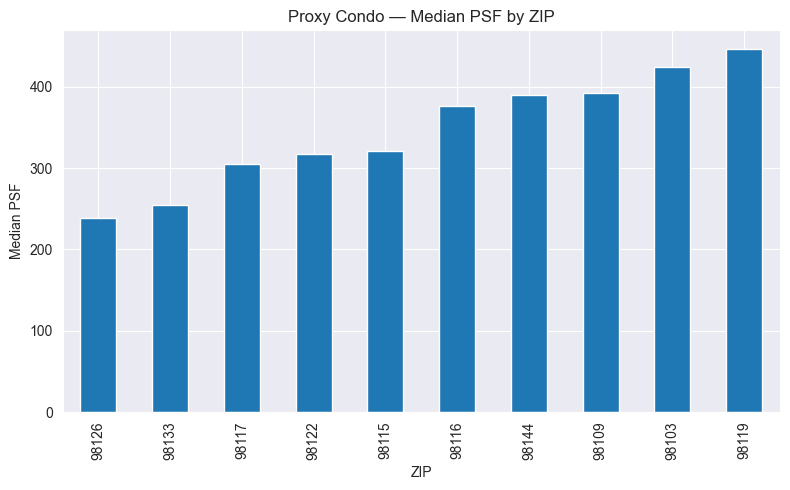

In [24]:

proxy = seattle[
    (seattle['sqft_lot'] <= 1200) &
    ((seattle['yr_built'] >= 2000) | (seattle['yr_renovated'] >= 2000)) &
    (seattle['sqft_living'].between(600,1100)) &
    (seattle['bedrooms'] <= 2)
    ].copy()

def summarize(frame, name):
    return pd.Series({
        'count': len(frame),
        'median_price': frame['price'].median(),
        'median_psf': frame['price_psf'].median(),
        'median_sqft': frame['sqft_living'].median(),
        'median_yr_built': frame['yr_built'].median()
    }, name=name)

summary_tbl = pd.concat([summarize(seattle,'Seattle All'),
                         summarize(proxy,'Proxy Condo')], axis=1)
display(summary_tbl)

pz = proxy.groupby('zip')['price_psf'].median().dropna().sort_values()
plt.figure()
pz.plot(kind='bar', rot=90)
plt.title('Proxy Condo — Median PSF by ZIP')
plt.xlabel('ZIP'); plt.ylabel('Median PSF')
plt.tight_layout(); plt.show()



## 11) Hypothesis Testing — Equations & Rationale

To strengthen the credibility of our conclusions, we test three hypotheses.

### 11.1 Core vs Non-Core price per sqft
**Why test?** Verify whether living in Seattle's core requires a statistically higher price per sqft (trade‑off: commute vs cost).
**Metric:** `price_psf` in core ZIPs vs non-core ZIPs.
**Hypotheses (one‑sided):**
$$
H_0:\ \mu_{\mathrm{core}}=\mu_{\mathrm{non\text{-}core}} \quad;\quad
H_1:\ \mu_{\mathrm{core}}>\mu_{\mathrm{non\text{-}core}}
$$
We implement **Welch’s t-test** (does not assume equal variances).

### 11.2 New vs Old homes (2000+ or renovated vs older)
**Why test?** Newer or renovated homes are more likely to offer modern amenities sought by the couple; test if there is a premium.
**Metric:** `price_psf` in new vs old groups.
**Hypotheses (one‑sided):**
$$
H_0:\ \mu_{\mathrm{new}}=\mu_{\mathrm{old}} \quad;\quad
H_1:\ \mu_{\mathrm{new}}>\mu_{\mathrm{old}}
$$
Use Welch’s t-test; if distributions are highly non‑normal, consider Mann–Whitney U as a robustness check.

### 11.3 Seasonality (ANOVA across months)
**Why test?** If monthly averages differ, it supports timing advice (e.g., better negotiation in winter, more selection in summer).
**Metric:** `price` grouped by month.
**Hypotheses (one‑way ANOVA):**
$$
H_0:\ \mu_{1}=\mu_{2}=\dots=\mu_{12} \quad;\quad
H_1:\ \exists\, i\neq j \ \text{such that}\ \mu_{i}\neq\mu_{j}
$$
If significant, consider post‑hoc tests (e.g., Tukey HSD).

In [25]:

from scipy import stats

# Core vs Non-core
core_zips = ['98101','98109','98121','98122','98119']
seattle['is_core'] = seattle['zip'].isin(core_zips)

core_psf = seattle[seattle['is_core']]['price_psf'].dropna()
noncore_psf = seattle[~seattle['is_core']]['price_psf'].dropna()

t1, p1 = stats.ttest_ind(core_psf, noncore_psf, equal_var=False)
print("Welch's t-test (core vs non-core PSF): t =", t1, "p =", p1)

# New vs Old
seattle['is_new'] = (seattle['yr_built'] >= 2000) | (seattle['yr_renovated'] >= 2000)
new_psf = seattle[seattle['is_new']]['price_psf'].dropna()
old_psf = seattle[~seattle['is_new']]['price_psf'].dropna()

t2, p2 = stats.ttest_ind(new_psf, old_psf, equal_var=False)
print("Welch's t-test (new vs old PSF): t =", t2, "p =", p2)

# ANOVA across months
sea['month'] = sea['date'].dt.month
groups = [g['price'].dropna().values for _, g in sea.groupby('month') if len(g)>=20]
if len(groups) >= 2:
    f3, p3 = stats.f_oneway(*groups)
    print("ANOVA (price across months): F =", f3, "p =", p3)
else:
    print("Not enough monthly groups for ANOVA.")


Welch's t-test (core vs non-core PSF): t = 7.831668336727708 p = 2.5115058914996704e-12
Welch's t-test (new vs old PSF): t = -1.522146787648874 p = 0.12822225448805183
ANOVA (price across months): F = 0.8817595347098609 p = 0.4142985793374181


## 12) Client-Facing Visuals

<Figure size 800x500 with 0 Axes>

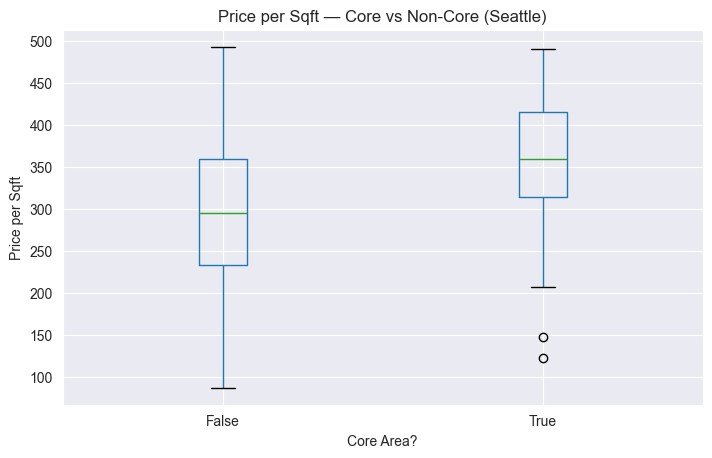

<Figure size 800x500 with 0 Axes>

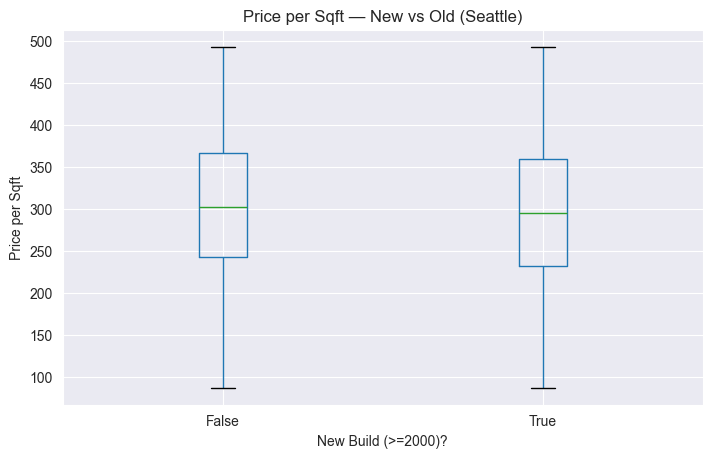

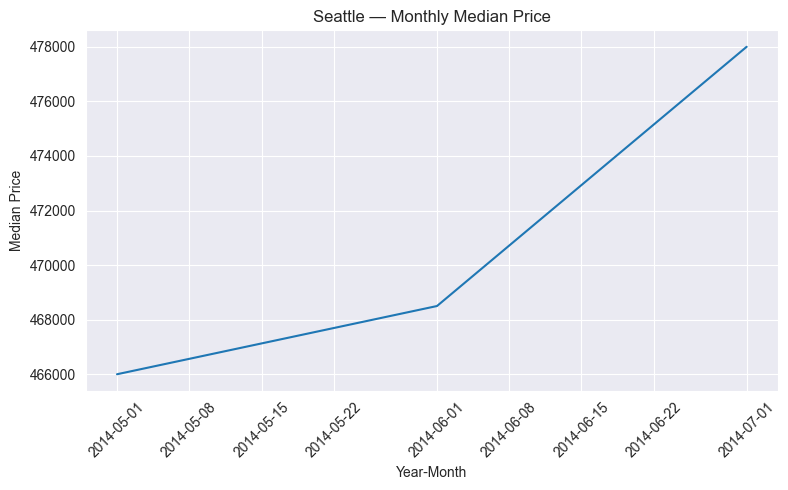

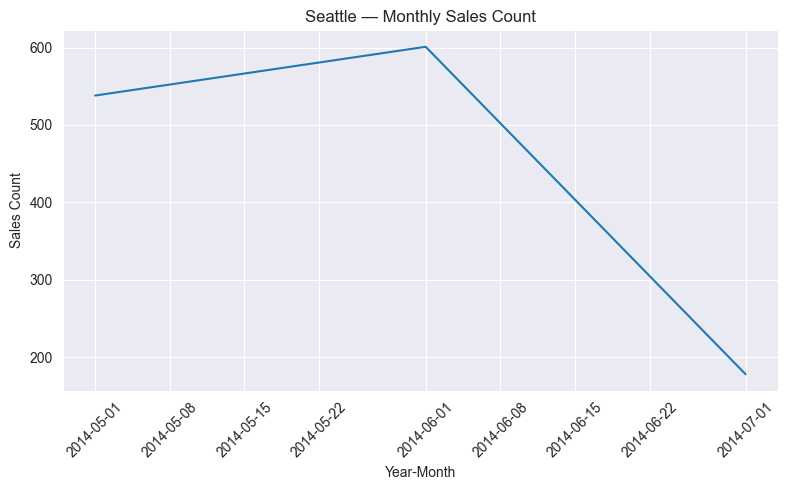

In [26]:

# Core vs Non-Core boxplot
plt.figure()
seattle.boxplot(column='price_psf', by='is_core')
plt.title('Price per Sqft — Core vs Non-Core (Seattle)')
plt.suptitle("")
plt.xlabel('Core Area?'); plt.ylabel('Price per Sqft')
plt.show()

# New vs Old boxplot
plt.figure()
seattle.boxplot(column='price_psf', by='is_new')
plt.title('Price per Sqft — New vs Old (Seattle)')
plt.suptitle("")
plt.xlabel('New Build (>=2000)?'); plt.ylabel('Price per Sqft')
plt.show()

# Seasonality (two charts for clarity)
plt.figure()
plt.plot(monthly['ym'], monthly['median_price'])
plt.title('Seattle — Monthly Median Price')
plt.xlabel('Year-Month'); plt.ylabel('Median Price')
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

plt.figure()
plt.plot(monthly['ym'], monthly['sales'])
plt.title('Seattle — Monthly Sales Count')
plt.xlabel('Year-Month'); plt.ylabel('Sales Count')
plt.xticks(rotation=45); plt.tight_layout(); plt.show()


## 13) Shortlist (Top 20 Recommendations)

In [27]:

proxy['rank'] = proxy['price_psf'].rank(method='min')*0.6 + proxy['price'].rank(method='min')*0.4
cols = ['date','price','price_psf','bedrooms','bathrooms','sqft_living','sqft_lot',
        'yr_built','yr_renovated','street','zip']
shortlist = proxy.sort_values('rank').head(20)[cols].reset_index(drop=True)
shortlist.to_csv(SHORTLIST_PATH, index=False)
print(f"Saved shortlist to: {SHORTLIST_PATH}")
shortlist.head(10)


Saved shortlist to: Data/shortlist_group4.csv


,date,price,price_psf,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,yr_renovated,street,zip
0,2014-05-28,210000.0,238.636364,2.0,1.50,880,1157,2007,0,9413 34th Ave SW,98126
1,2014-06-11,250000.0,254.582485,2.0,1.50,982,846,2006,0,10217 Aurora Ave N,98133
2,2014-05-29,305000.0,305.000000,2.0,2.25,1000,905,2006,0,7534 24th Ave NW,98117
3,2014-05-22,270000.0,321.428571,2.0,1.50,840,867,2005,0,9122 23rd Ave NE,98115
4,2014-07-01,332888.0,317.036190,2.0,2.50,1050,1029,2007,0,101-115 26th Ave,98122
5,2014-05-12,369000.0,376.530612,2.0,2.50,980,895,2009,0,1716 California Ave SW,98116
6,2014-06-24,329445.0,396.921687,2.0,1.50,830,1119,2005,0,2300 14th Ave S,98144
7,2014-06-24,355000.0,381.720430,2.0,2.25,930,747,2007,0,2107 13th Ave S,98144
8,2014-05-07,339950.0,414.573171,2.0,1.00,820,681,2006,0,513 N 46th St,98103
9,2014-06-30,427500.0,392.201835,2.0,2.00,1090,934,2008,0,1700 Dexter Ave N,98109



## 14) Story Summary — What / Why / When

**What:** Recommend 1–2 bed, 600–1100 sqft, newer (≥2000 or renovated) small-lot units in Seattle core ZIPs — a good proxy for modern condos near tech hubs.
**Why:** Core areas minimize commute and offer vibrant amenities; newer stock is more likely to include modern features. Total budget can be managed via compact floorplans while keeping quality of life high.
**When:** Based on historical patterns, **late spring/summer** offers more selection; **late fall/winter** may offer better negotiation leverage (supported by seasonality charts and tests).

> Limitations: The dataset does not include explicit condo/amenities fields; we use small lot size and newer year as proxies. Before transactions, verify HOA fees, amenities, and safety with current listings.
